# Introduction

Mental health issues have been a very rampant issue globally affecting most people, both the young and the old. The reason for mental health issues and its increase is due to a number of reasons which include; childhood abuse, trauma, or neglect.

Diagnosing mental health is difficult because people aren’t always willing to talk about their problems.

The analysis below shows how mental health has affected people across different countries with an attempt to create a model that will predict mental health issues.¶

# Dataset Details

## Title : Prediction of the Mental Health of Employees 

This dataset is used to approximate how people are affected by Mental Health issues. This dataset focuses on employees at a certain company.
The dataset is made up of 1259 instances and 27 attributes.

## Column Description

## Timestamp - 
time when the input was recorded

## Age - 
age of the employees

## Gender - 
gender of the employees

## Country - 
country of the employees

## State - 
abbreviation of the country name

## self-employed - 
is the employee self employed or not

## family- history - 
is there a family history of mental health issue

## treatment - 
treatment of the mental health issue

## work_interfere - 
are there any work interferences?

## no_employees - 
number of employees

## leave - 
employees take off from work

## mental_health_consequence - 
effects of mental health

## phys_health_consequence - 
effects of physical health caused by mental health

## coworkers - 
one who works with another

## supervisor - 
a manager

## mental_health_interview - a meeting to find out about mental health

phys_health_interview - 
a meeting to find out about physical health

## mental_vs_physical - 
correlation between mental health and physical health

## obs_consequence - 
In terms of mental health, "obs_consequence" can be understood as the impact or consequence of experiencing an obsessive-compulsive disorder (OCD).

Obsessive-compulsive disorder is a mental health condition characterized by intrusive thoughts (obsessions) that lead to repetitive behaviors (compulsions). These obsessions and compulsions can significantly interfere with daily life and cause distress.

Therefore, "obs_consequence" refers to the negative outcomes or effects that result from the presence of obsessions and compulsions in someone with OCD. These consequences may include:

Distress and Anxiety: Obsessions can cause significant distress and anxiety, leading to impaired functioning in various areas of life, such as work, relationships, and daily activities.
Interference with Daily Activities: Compulsions often consume a lot of time and energy, interfering with the individual's ability to focus on other tasks or responsibilities.
Impact on Relationships: OCD symptoms can strain relationships with family, friends, and romantic partners, as the compulsive behaviors may be difficult for others to understand or tolerate.
Impaired Quality of Life: The constant presence of obsessions and compulsions can lower overall quality of life, as individuals may feel controlled by their symptoms and unable to fully engage in enjoyable activities.
Physical Consequences: Some compulsive behaviors can lead to physical consequences, such as skin irritation from excessive hand washing or injury from repetitive actions.
Social Isolation: Due to the distress and interference caused by OCD symptoms, individuals may withdraw from social activities and isolate themselves from others.
Depression: Persistent OCD symptoms can lead to feelings of hopelessness, despair, and depression.
Negative Self-Image: People with OCD may develop a negative self-image due to their inability to control their thoughts and behaviors, leading to feelings of shame or guilt.
Understanding and addressing these obs_consequences is crucial in developing effective treatment strategies for individuals with OCD, such as therapy, medication, or a combination of both.

## comments - 
comments from employees regarding the interview


# Import Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Reading data from a csv file

In [11]:
data = pd.read_csv('mentalhealthdataset.csv')
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [12]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [13]:
data.tail()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,11/30/2015 21:25,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2/1/2016 23:04,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


# The columns that are in the dataset

In [15]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

# Exploratory Data Analysis

This gives more information about the dataset

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [19]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [20]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

# Finding and Dealing with missing values


The above dataset has missing values in the state,self-employed,work_interfere and comments columns.

In [23]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

One way of dealing with missing values is by dropping the columns with the missing values. We now drop the columns:comments,state and Timestamp because these columns have missing values that are quite hard to fill

In [25]:
data.drop(['comments'], axis= 1, inplace=True)
data.drop(['state'], axis= 1, inplace=True)
data.drop(['Timestamp'], axis= 1, inplace=True)

data.isnull().sum().max() 
data.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Another way of dealing with missing values is filling in the missing values. This is done using the function fillna(). We now fill missing values in self_employed column with the words "Don't Know"

In [27]:
data["self_employed"].fillna("Don't Know", inplace = True)
 
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Don't Know,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,Don't Know,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Don't Know,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Don't Know,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Don't Know,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,NaN,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,NaN,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


We now fill missing values in work_interfere column with the words "Don't Know"

In [29]:
data["work_interfere"].fillna("Don't Know", inplace = True)
 
data

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Don't Know,No,Yes,Often,25-Jun,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,Don't Know,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,Don't Know,No,No,Rarely,25-Jun,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Don't Know,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,Don't Know,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,Don't Know,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,Don't Know,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


Check if there are still any missing values

In [31]:
data.isnull().sum()
#there are no missing values

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

We now fill in missing values on the age column with the median of the available values

In [33]:
data['Age'].fillna(data['Age'].median(), inplace = True)
s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s
#Ranges of the ages
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

# Ploting

We now plot the distribution and density of the mental health in comparison to age using a distribution plot.

Text(0.5, 0, 'Age')

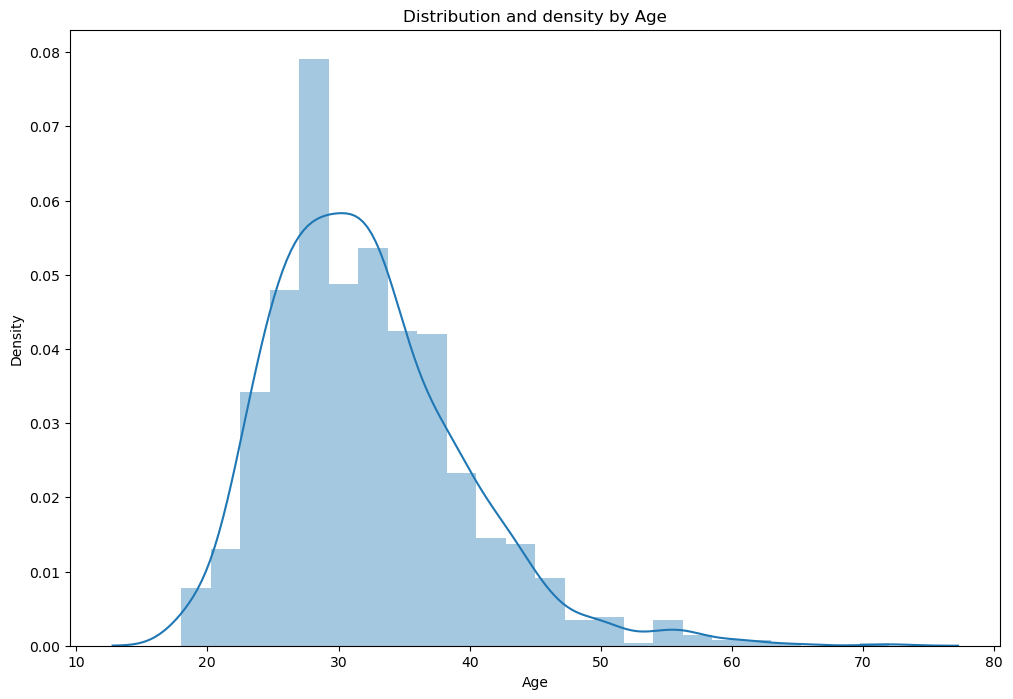

In [36]:
#distribution plot
plt.figure(figsize=(12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

According to the above, people between the ages 25 - 35 appear to be affected by mental health issues.

People between the ages 18 - 30, there appears to be a steady rise in mental health issues.

People between the ages 38-70, there appears to be a decline in mental health issues.

People aged between 60 - 80 have little to no mental health issue.

It is clear that that people aged between 25 - 35 are suffering from mental health issues caused by various factors.

According to the above analysis, most people have acquired treatment. However, a number have also not acquired treatment which is relatively closer to the number of those who have acquired treatment.



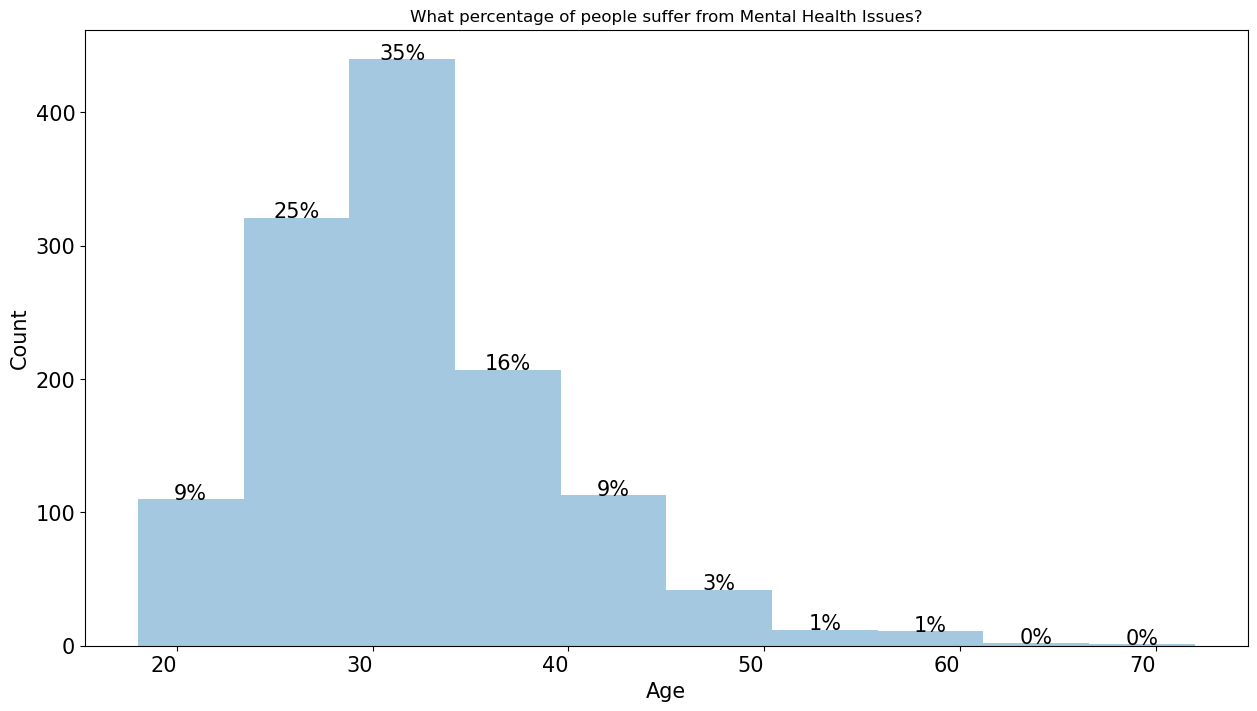

In [38]:
col = 'Age'
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(data[col], kde = False, bins = 10)
plt.xticks(rotation = 0, fontsize = 15, ha = "right")
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('What percentage of people suffer from Mental Health Issues?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

People between the ages 30 - 35 have recorded high mental health issues at 35%

Followed by that, are people between the ages 25 - 30 who exhibit a percentage of 25%


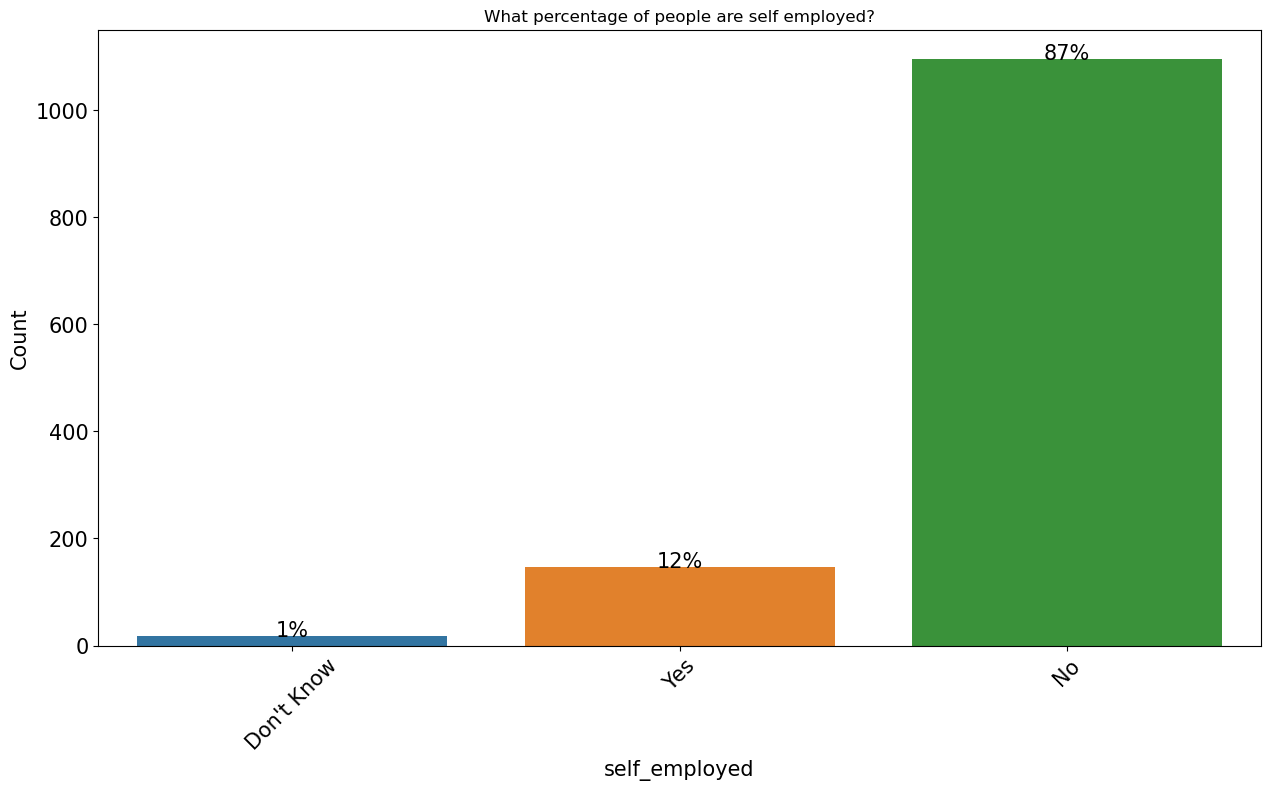

In [40]:
col = 'self_employed'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('What percentage of people are self employed?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

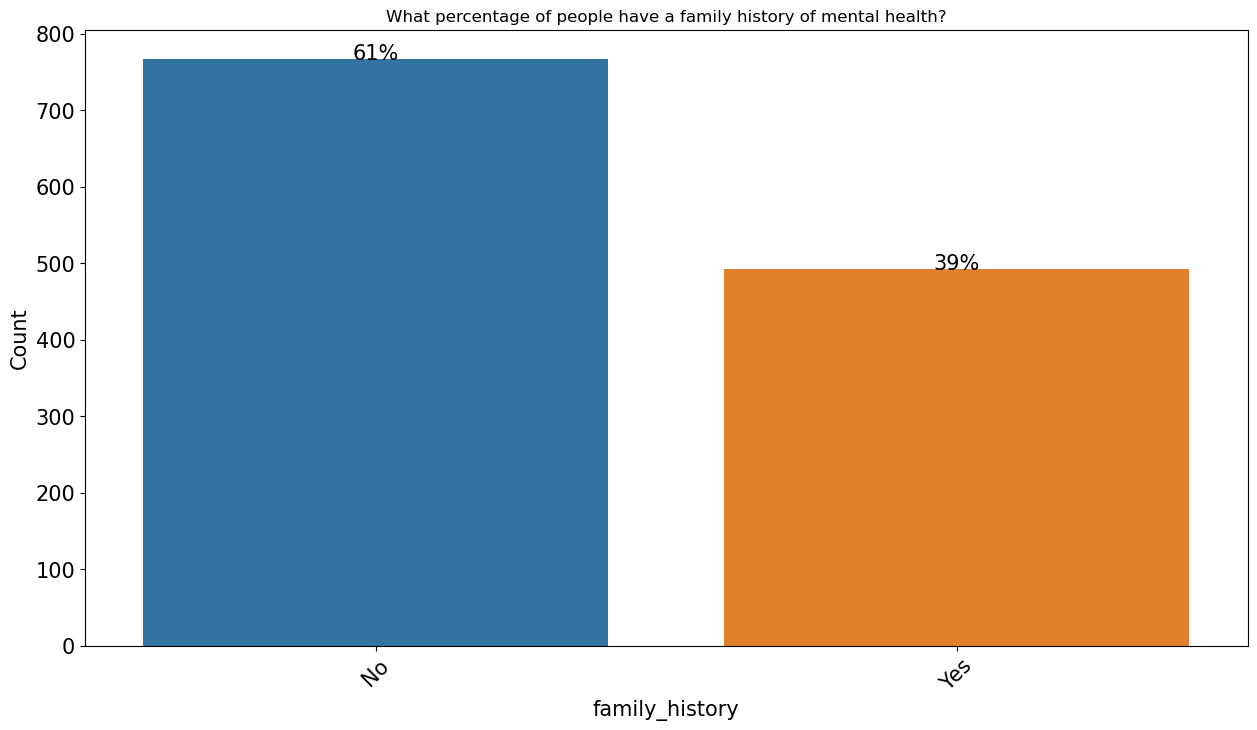

In [41]:
col = 'family_history'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('What percentage of people have a family history of mental health?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

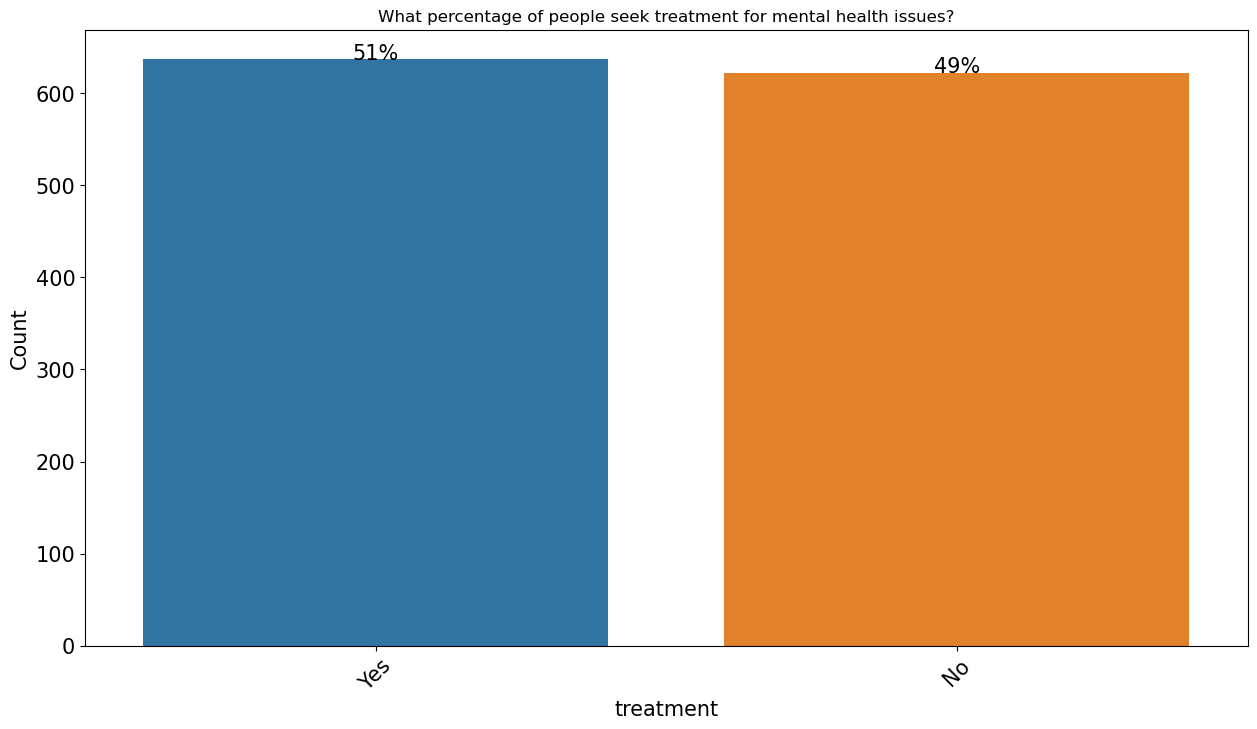

In [42]:
col = 'treatment'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('What percentage of people seek treatment for mental health issues?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

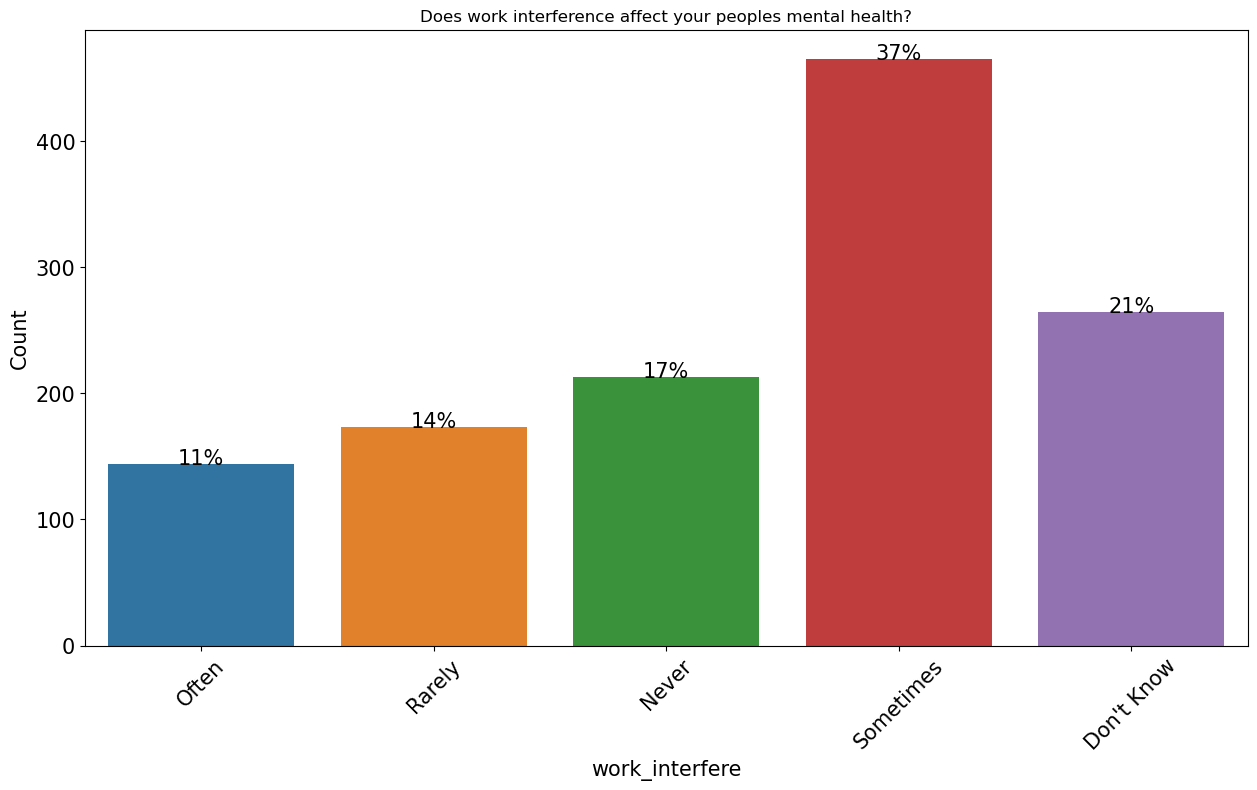

In [43]:
col = 'work_interfere'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Does work interference affect your peoples mental health?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

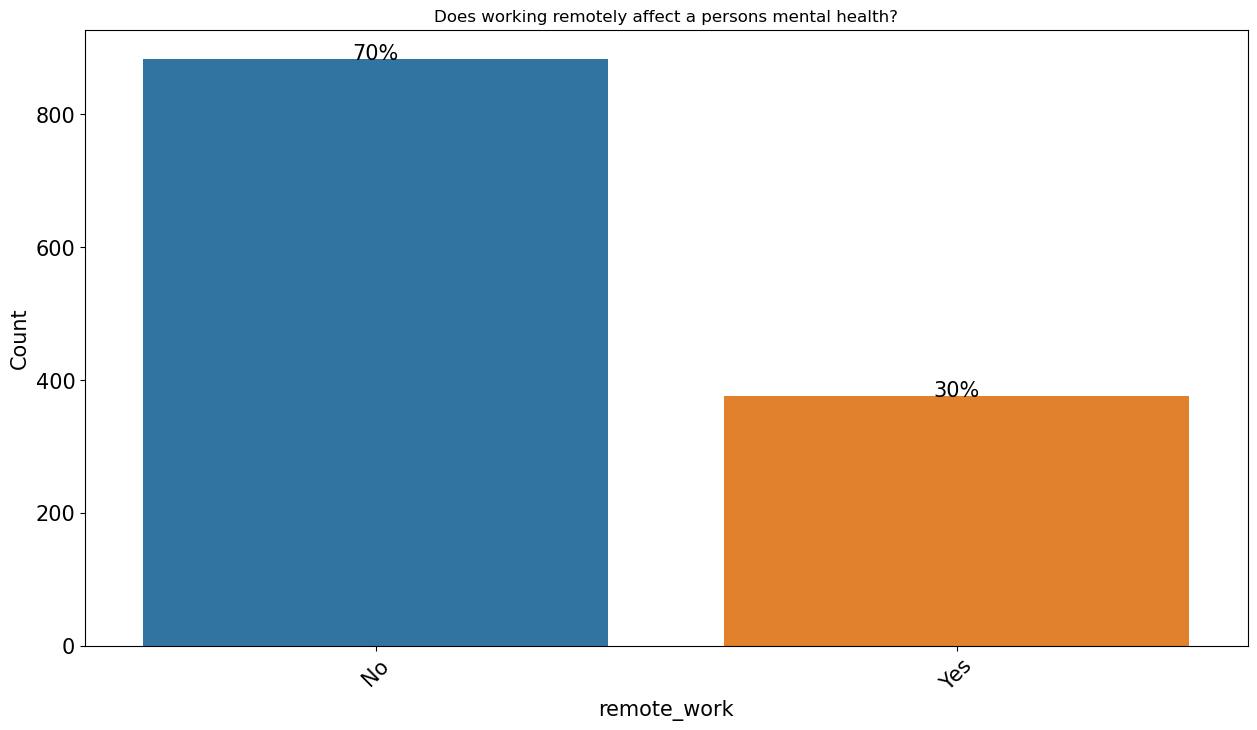

In [44]:
col = 'remote_work'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Does working remotely affect a persons mental health?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

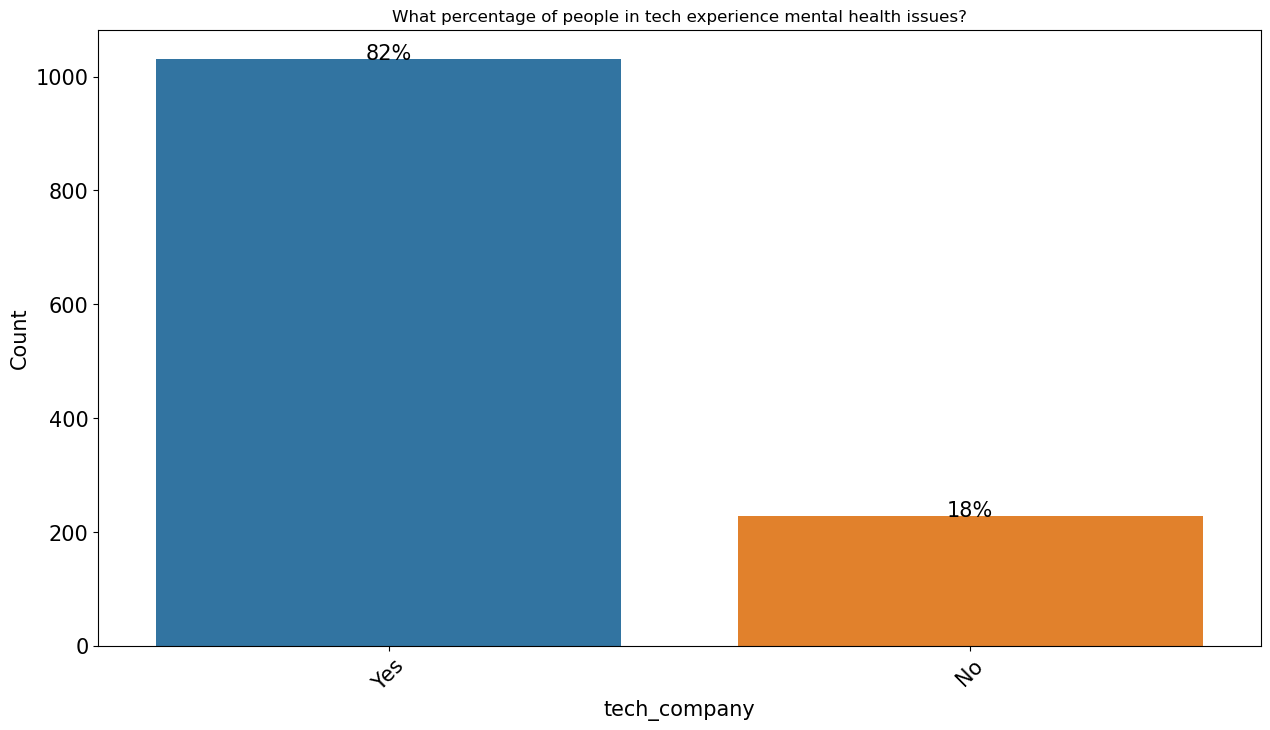

In [45]:
col = 'tech_company'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('What percentage of people in tech experience mental health issues?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

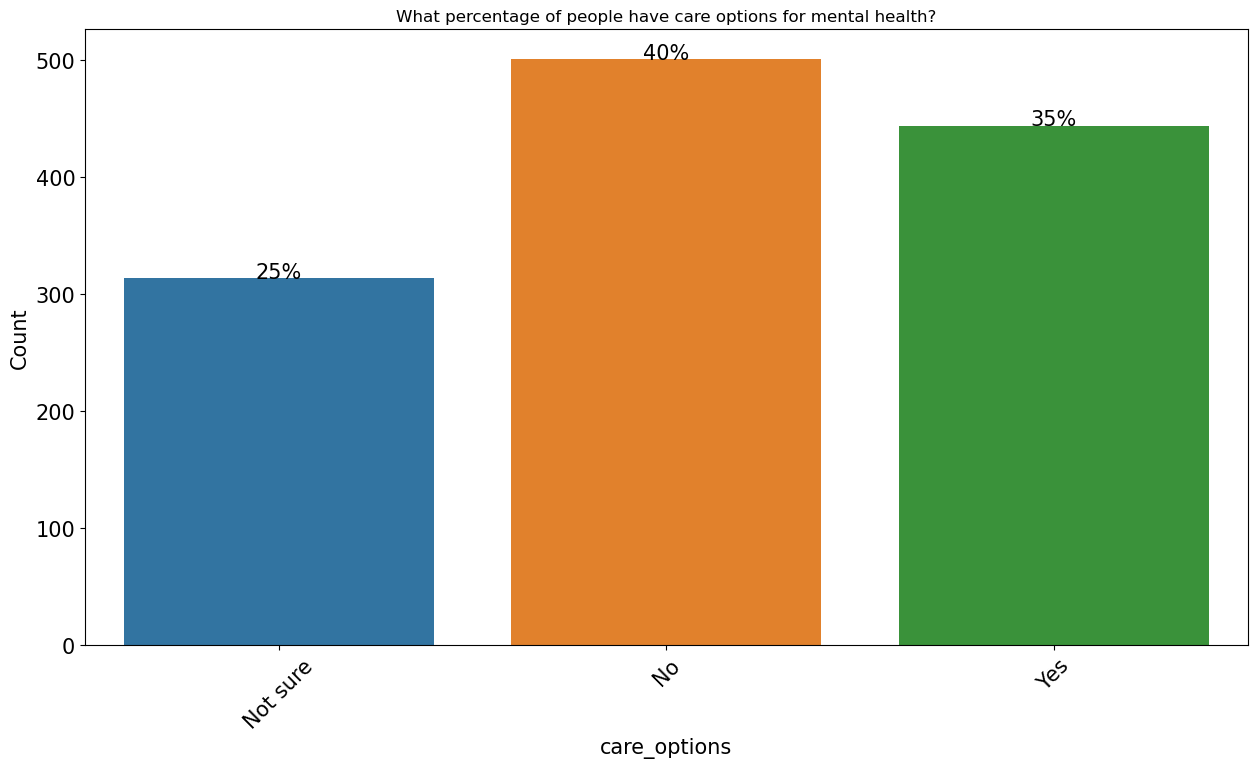

In [46]:
col = 'care_options'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('What percentage of people have care options for mental health?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

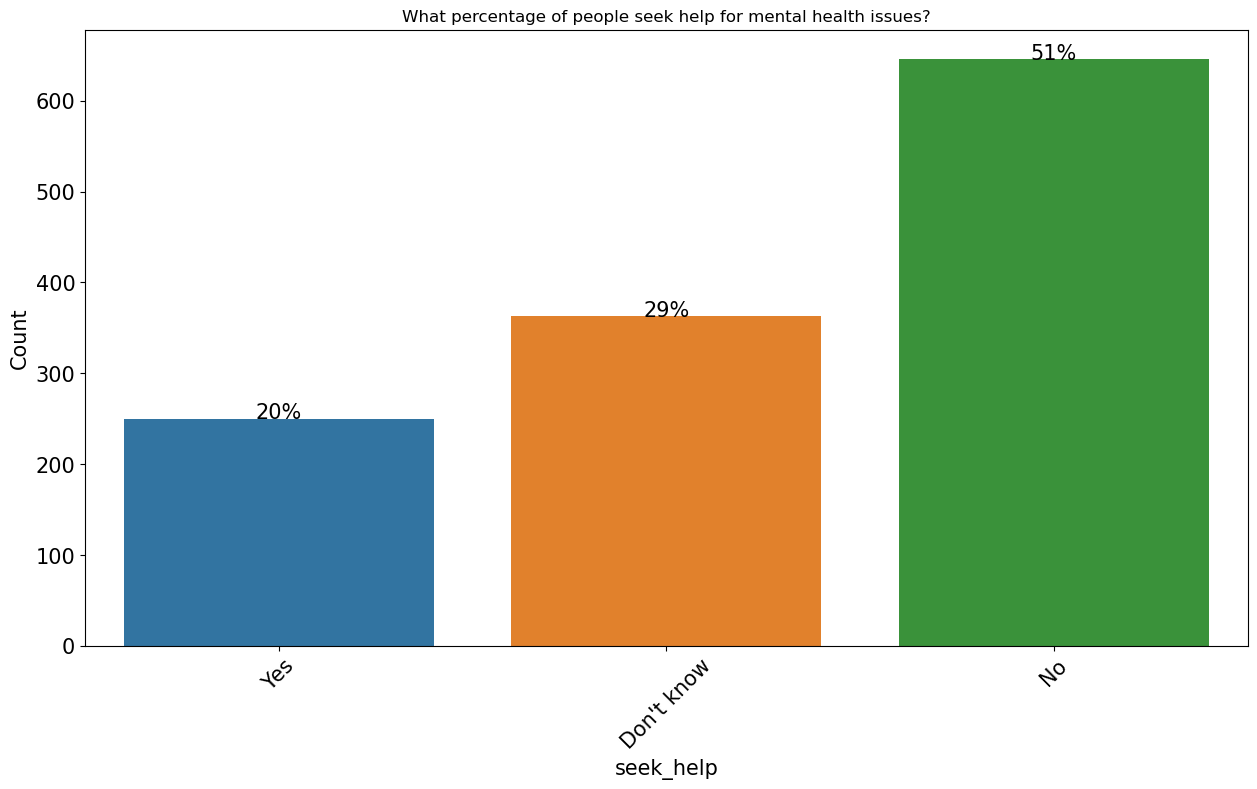

In [47]:
col = 'seek_help'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('What percentage of people seek help for mental health issues?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

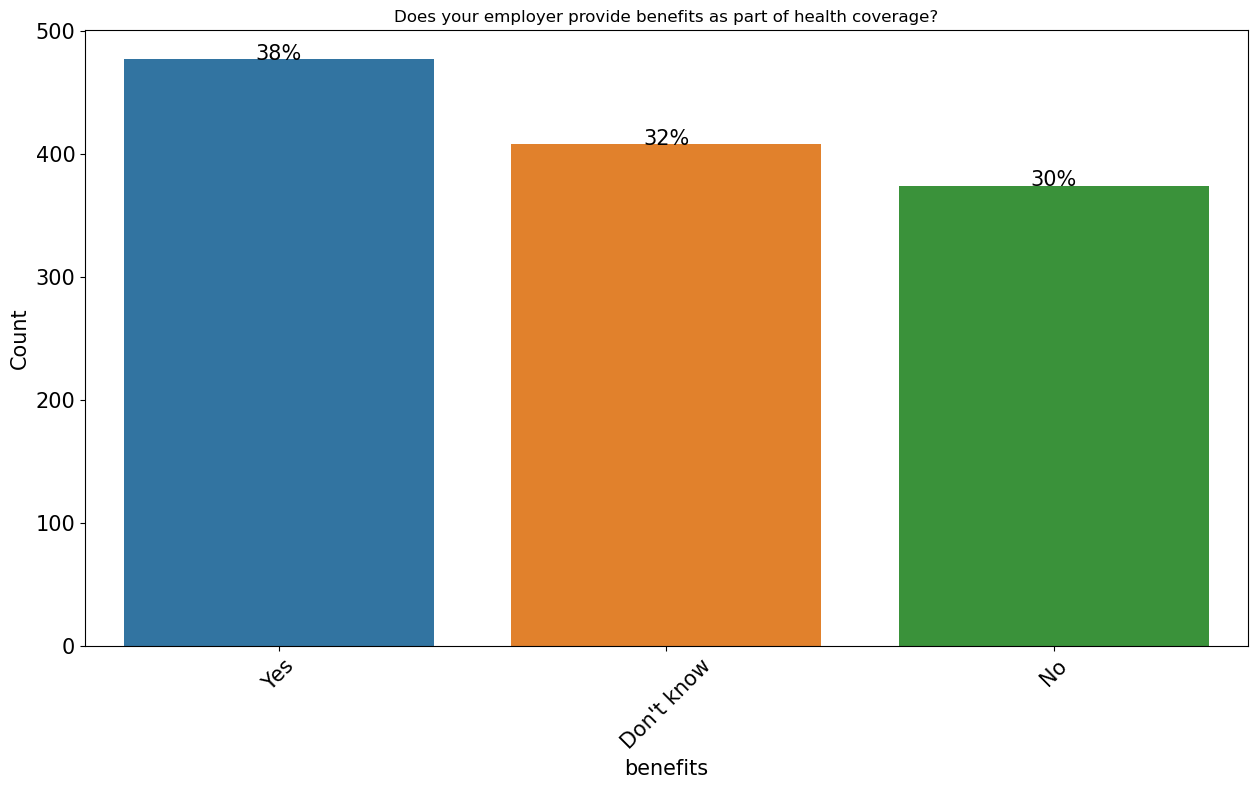

In [48]:
col = 'benefits'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Does your employer provide benefits as part of health coverage?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

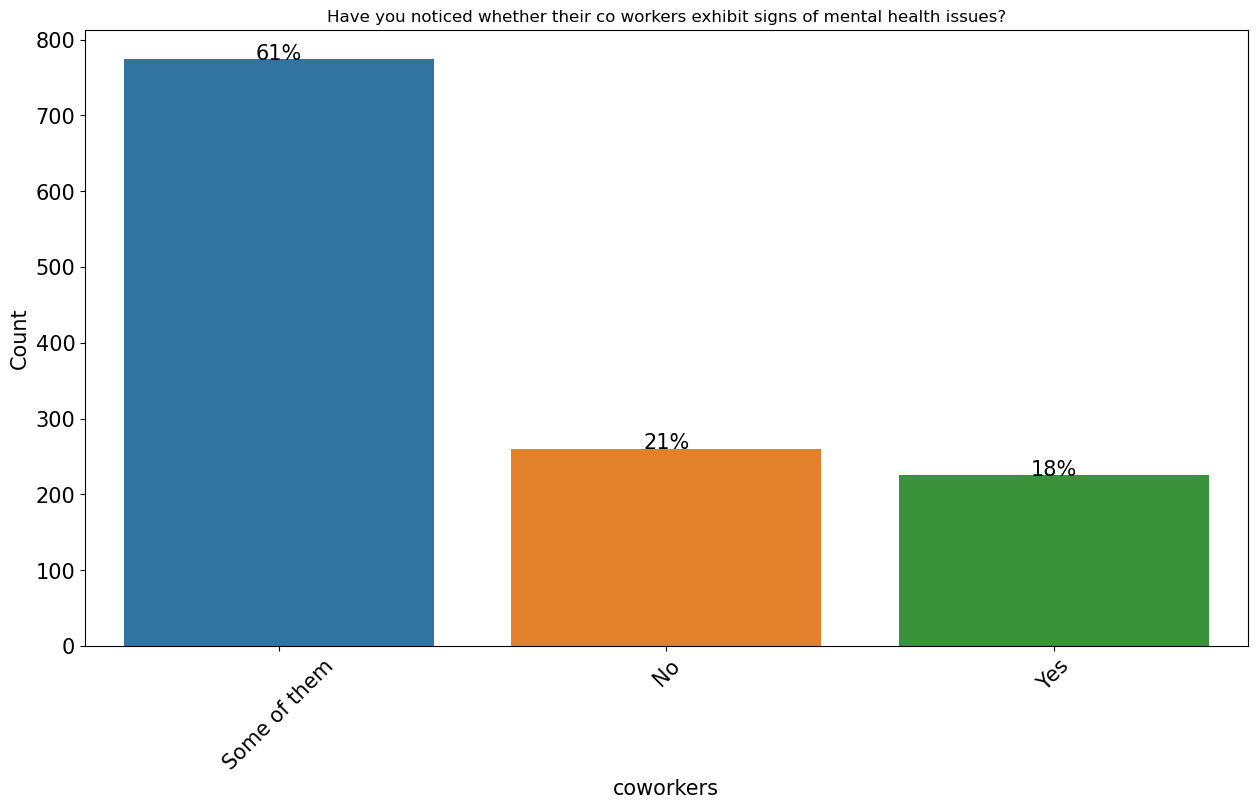

In [49]:
col = 'coworkers'
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x = col, data = data)
plt.xticks(rotation = 45, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(col, fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Have you noticed whether their co workers exhibit signs of mental health issues?')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/data.shape[0]:.0%}', (x + width/2, y + height * 1), ha='center', fontsize = 15)
plt.show()

-According to the above, we can derive the following analysis.

-More males suffer from mental health compared to Females. -The United States of America records high number of mental health issues and the United Kingdom comes second.

-At 87%, People who are not self employed tend to have a higher chance of mental health issue compared to those who are self employed.

-Most people have a family history of mental health issues.

-51% of people seek treatment for mental health issues while 49% of people do not.

-37% of people show that sometimes work interefrence affects thier mental health.

-70% of people working remotely have no mental health issues whereas 30% experience mental health issues.

-82% of people working in a tech company experience mental health issues.

-40% of people have no care options for mental health issues whereas 35% have care options and 25% of people are not sure.

-51% of people do not seek help for mental health issues, 20% of people seek help , 29% of people sometimes seek help for mental health issues.

-38% of people are provided with benefits from employer, 30% are not provided with benefits  by employer whereas 32% are unsure whwther benefits are provided.

-61% of people have noticed that their coworkers sometimes exhibit signs of mental health issues.

# Data Encoding

In [52]:
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['A little about you', 'Agender', 'All', 'Androgyne', 'Cis Female', 'Cis Male', 'Cis Man', 'Enby', 'F', 'Femake', 'Female', 'Female ', 'Female (cis)', 'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^', 'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)', 'Male-ish', 'Malr', 'Man', 'Nah', 'Neuter', 'Trans woman', 'Trans-female', 'Woman', 'cis male', 'cis-female/femme', 'f', 'femail', 'female', 'fluid', 'm', 'maile', 'male', 'male leaning androgynous', 'msle', 'non-binary', 'ostensibly male, unsure what that really means', 'p', 'queer', 'queer/she/they', 'something kinda male?', 'woman']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark'

Text(0.5, 1.0, 'Total Distribution by treated or not')

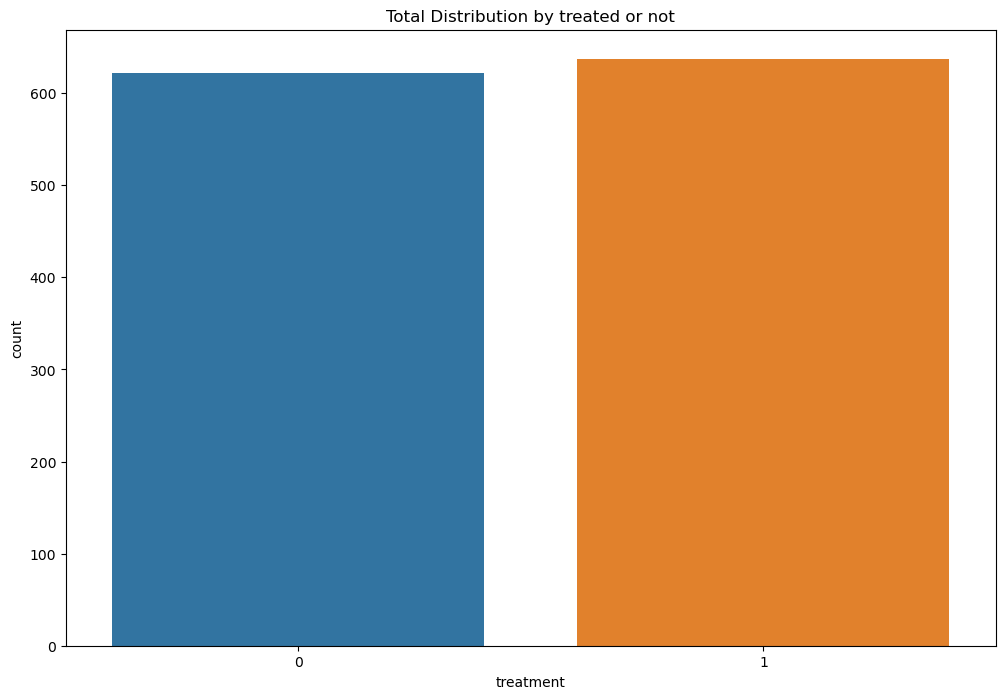

In [53]:
#treatment in relation to gender, with 0 for male, 1 for female
plt.figure(figsize=(12,8))
labels = labelDict['label_Gender']
j = sns.countplot(x="treatment", data=data)

plt.title('Total Distribution by treated or not')

In the above, more males are treated as compared to females in the dataset. Males = 1, Females = 0

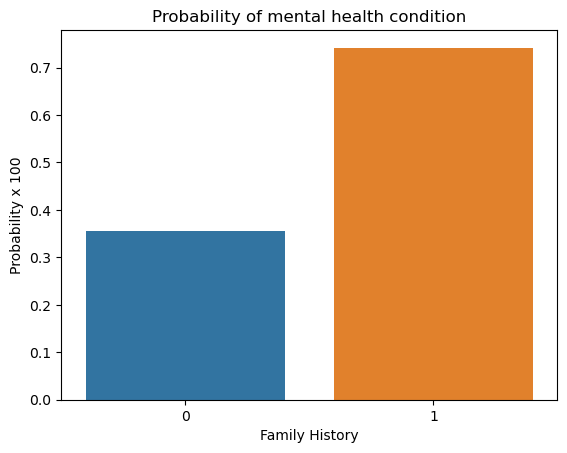

In [55]:
a = labelDict['label_family_history']
b= sns.barplot(x="family_history", y="treatment",data=data,ci=None)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')
new_labels = labelDict['label_Gender']
plt.show()


According to the above, those with a family history of mental health issue have a high probability of mental health issues

# Correlation

Correlation using the pearson method

In [59]:
#correlation
data.corr(method ='pearson')

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
Age,1.000000,0.043044,0.153776,0.059622,0.008898,0.072498,0.038928,0.131750,0.144648,-0.055910,...,-0.011344,0.028300,-0.050316,-0.007452,0.008296,0.062305,-0.022981,-0.012065,0.067801,0.774263
Gender,0.043044,1.000000,-0.161226,0.090746,-0.051719,-0.051068,-0.036484,-0.032291,0.043897,-0.023229,...,0.010615,-0.012095,0.012745,0.021967,0.003079,0.001262,0.018253,-0.001396,-0.009982,0.027798
Country,0.153776,-0.161226,1.000000,-0.100506,0.062107,0.077681,0.029234,0.132127,-0.017342,-0.041091,...,-0.102454,-0.045102,-0.016538,-0.030811,-0.001308,0.052658,-0.016293,-0.011894,-0.070225,0.136715
self_employed,0.059622,0.090746,-0.100506,1.000000,0.009304,0.019440,0.024747,0.032694,0.289530,0.066589,...,0.178628,0.029308,0.007321,0.046455,0.023083,-0.002298,-0.021901,0.133886,0.079816,0.064337
family_history,0.008898,-0.051719,0.062107,0.009304,1.000000,0.377918,0.322290,0.012341,0.014456,-0.046079,...,0.022631,0.028196,0.002832,-0.000847,0.003729,0.044564,0.039894,0.041089,0.124861,0.050140
treatment,0.072498,-0.051068,0.077681,0.019440,0.377918,1.000000,0.614879,0.017595,0.026937,-0.031525,...,0.061549,0.030221,-0.008933,0.068433,-0.036199,0.098413,0.051859,0.062642,0.156972,0.064091
work_interfere,0.038928,-0.036484,0.029234,0.024747,0.322290,0.614879,1.000000,0.011632,0.034725,0.005897,...,0.050352,0.060506,-0.020522,0.004070,-0.100000,0.098978,-0.017172,0.047200,0.134160,0.045215
no_employees,0.131750,-0.032291,0.132127,0.032694,0.012341,0.017595,0.011632,1.000000,-0.058497,-0.153030,...,-0.067353,0.026642,-0.067317,-0.105813,-0.108273,0.078575,0.061762,0.037507,0.076867,0.072852
remote_work,0.144648,0.043897,-0.017342,0.289530,0.014456,0.026937,0.034725,-0.058497,1.000000,0.131108,...,0.099669,0.054828,-0.009578,0.082438,0.025220,-0.029730,-0.014344,0.036591,-0.039065,0.117446
tech_company,-0.055910,-0.023229,-0.041091,0.066589,-0.046079,-0.031525,0.005897,-0.153030,0.131108,1.000000,...,0.047363,0.001336,0.066134,0.075383,0.049543,-0.041117,-0.032186,0.029191,-0.062347,-0.033391


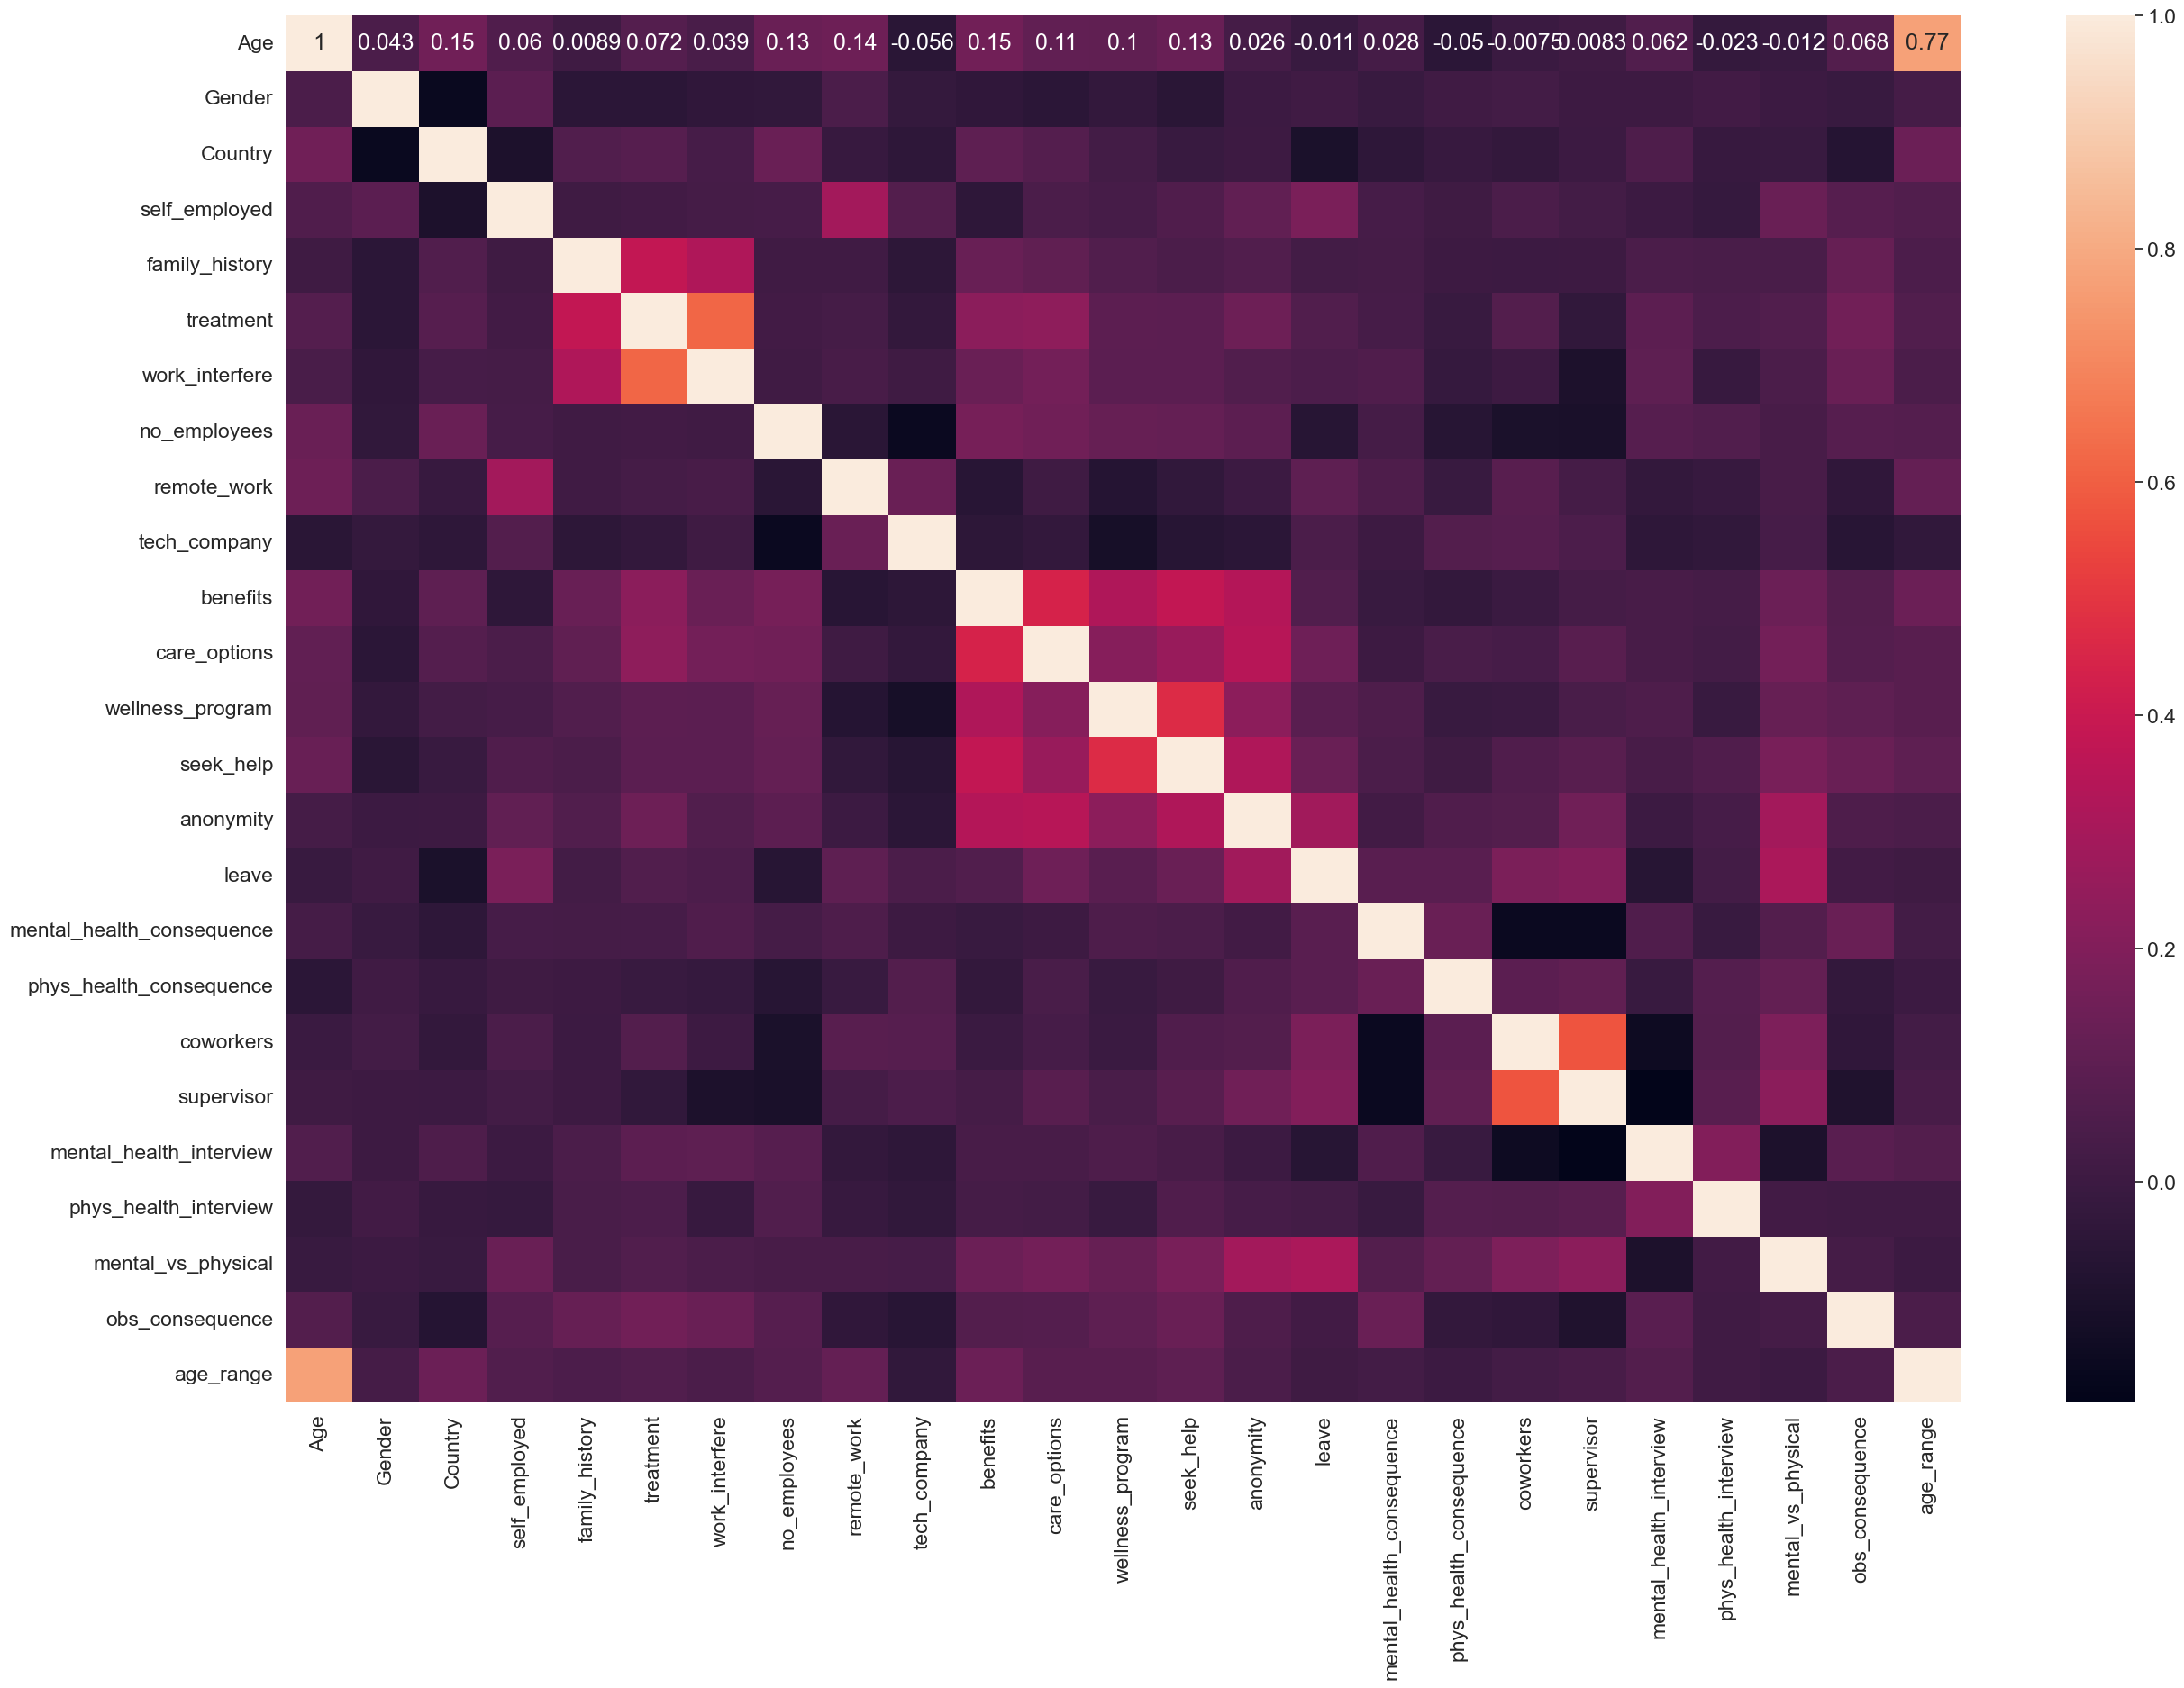

In [60]:
#visualization of the above correlation using a heatmap
cor=data.corr()
plt.figure(figsize=(30,20))
sns.set(font_scale=1.5)
fig=sns.heatmap(cor, annot=True)

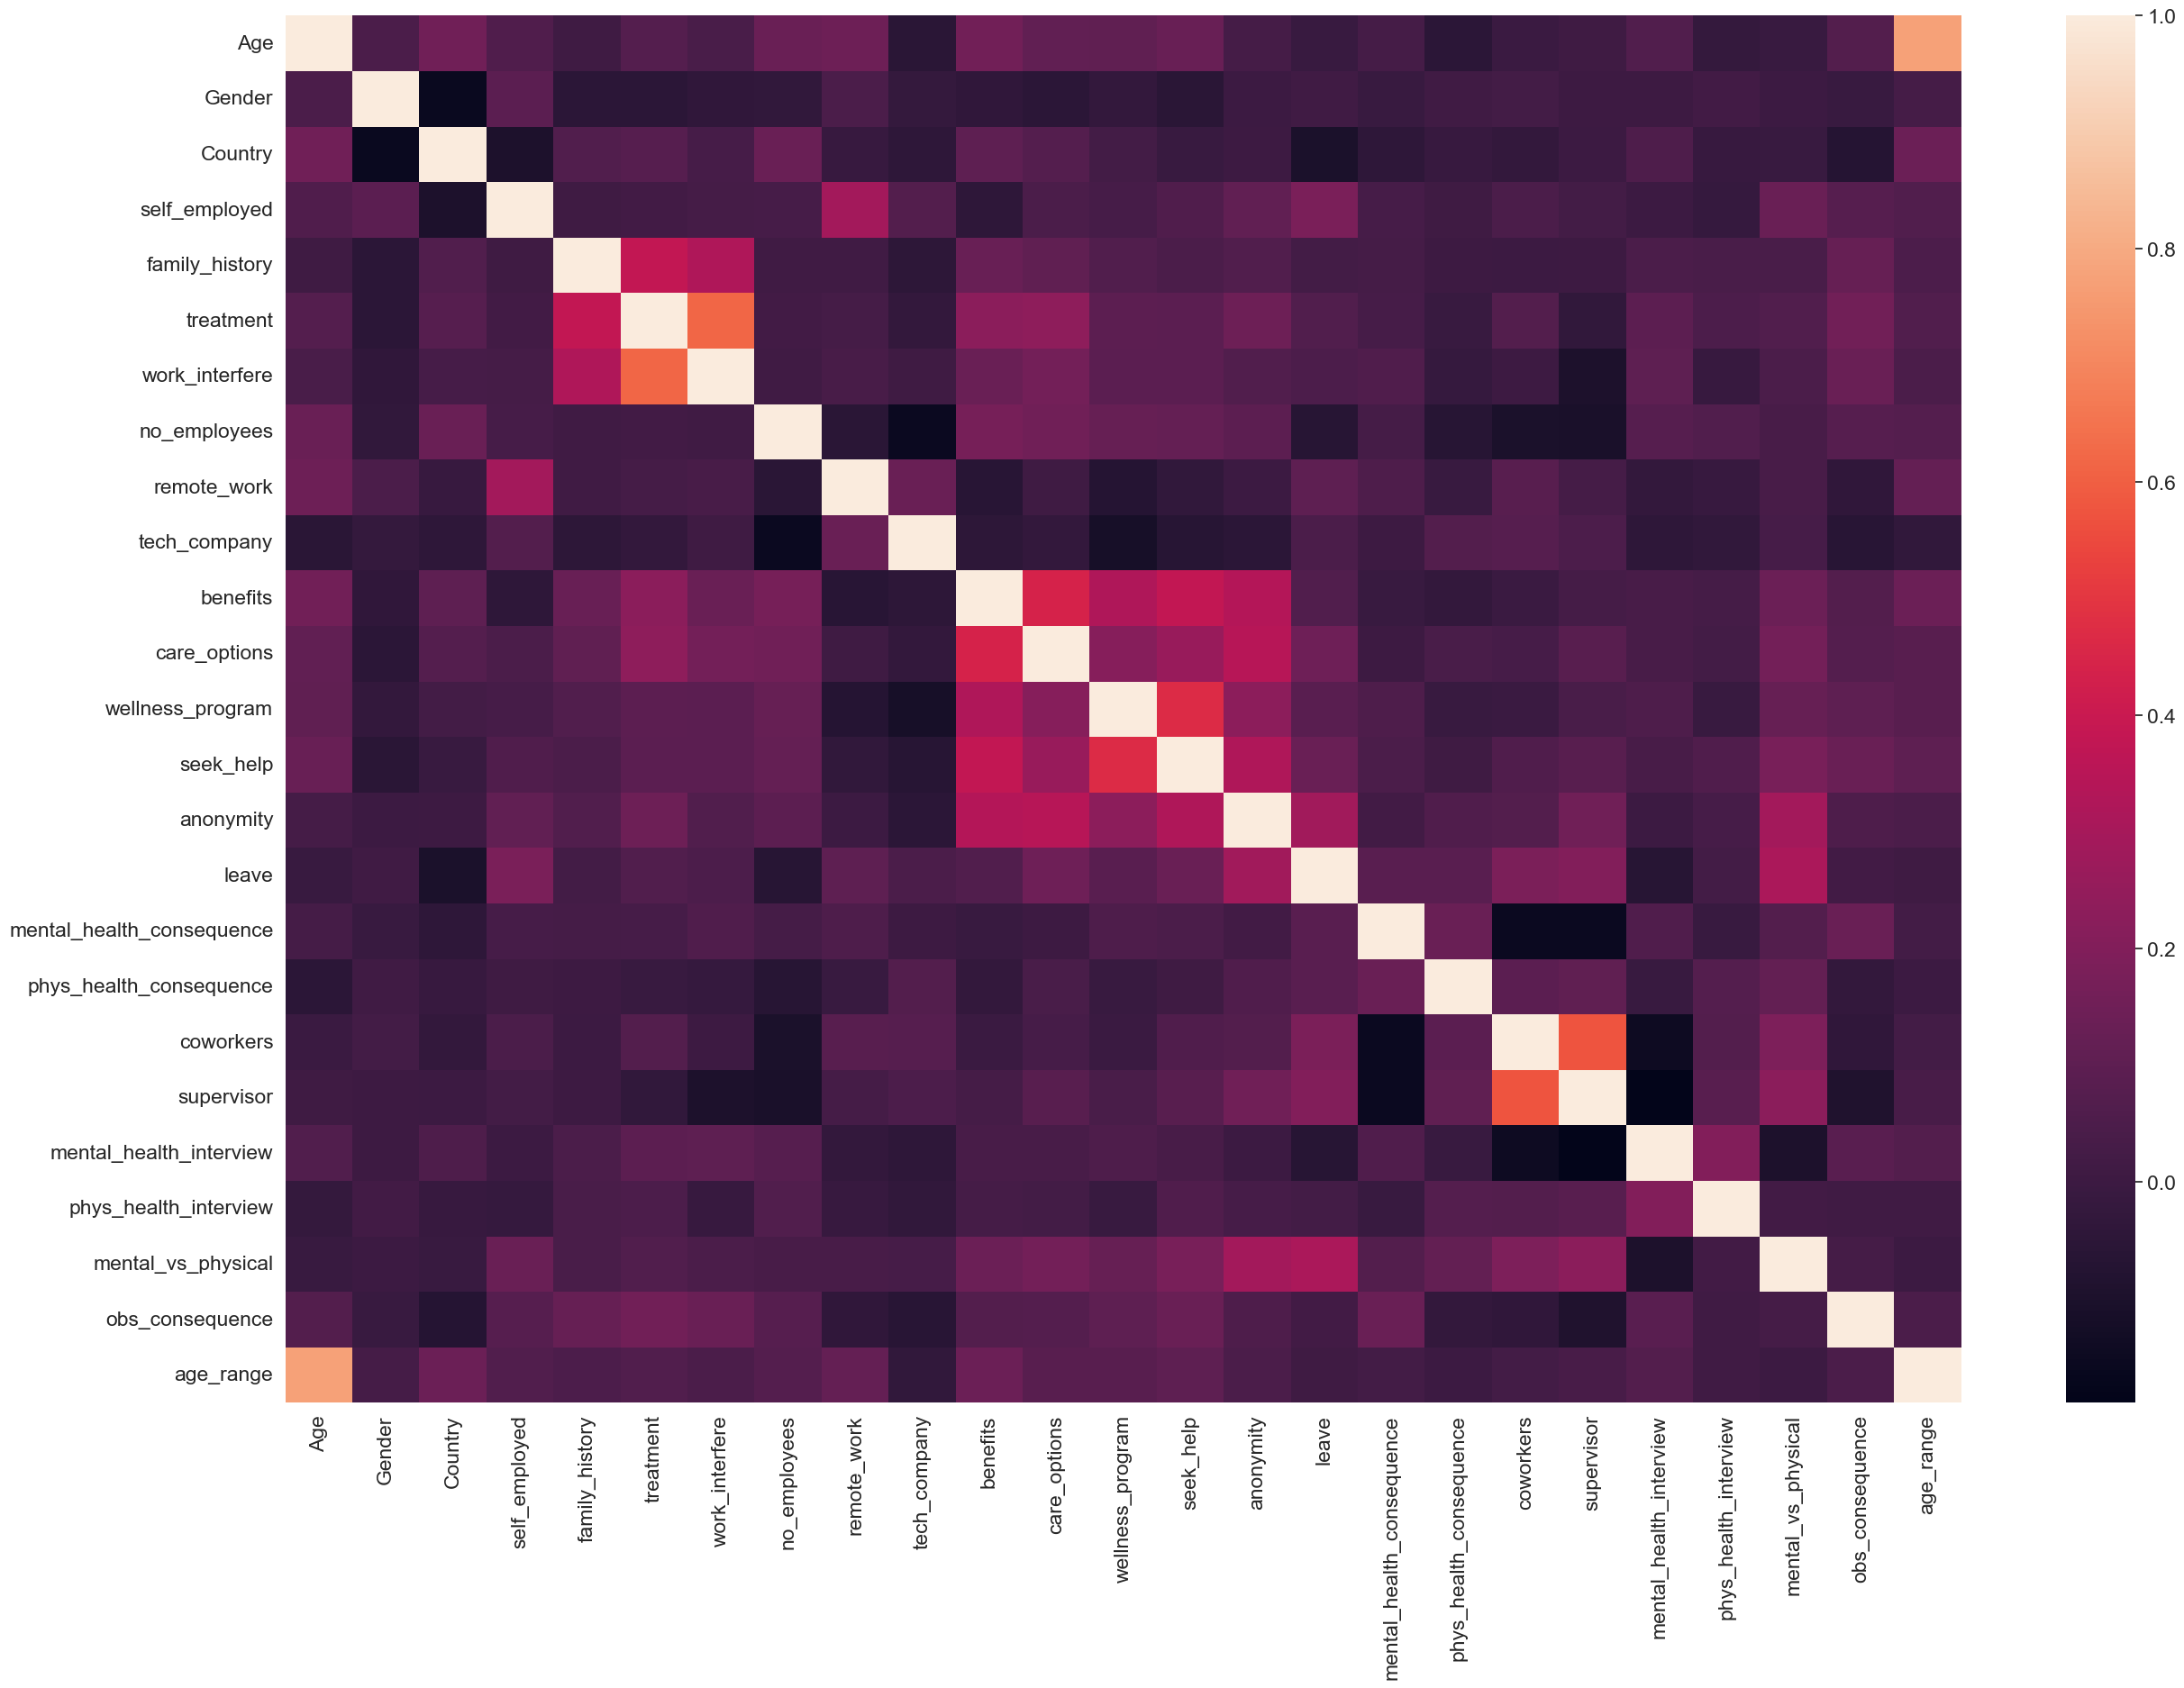

In [61]:
#this is a heatmap showing correlation among the attributes without the annotation
cor=data.corr()
plt.figure(figsize=(30,20))
sns.set(font_scale=1.5)
fig=sns.heatmap(cor)

In [62]:
#correlation between the attributes
cor_target=abs(cor['Age'])
cor_target

Age                          1.000000
Gender                       0.043044
Country                      0.153776
self_employed                0.059622
family_history               0.008898
treatment                    0.072498
work_interfere               0.038928
no_employees                 0.131750
remote_work                  0.144648
tech_company                 0.055910
benefits                     0.154760
care_options                 0.108950
wellness_program             0.103527
seek_help                    0.130644
anonymity                    0.026194
leave                        0.011344
mental_health_consequence    0.028300
phys_health_consequence      0.050316
coworkers                    0.007452
supervisor                   0.008296
mental_health_interview      0.062305
phys_health_interview        0.022981
mental_vs_physical           0.012065
obs_consequence              0.067801
age_range                    0.774263
Name: Age, dtype: float64

In [63]:
#relevant features, showing the highly correlated features
relevant_feature =cor_target[cor_target>0.02]
relevant_feature

Age                          1.000000
Gender                       0.043044
Country                      0.153776
self_employed                0.059622
treatment                    0.072498
work_interfere               0.038928
no_employees                 0.131750
remote_work                  0.144648
tech_company                 0.055910
benefits                     0.154760
care_options                 0.108950
wellness_program             0.103527
seek_help                    0.130644
anonymity                    0.026194
mental_health_consequence    0.028300
phys_health_consequence      0.050316
mental_health_interview      0.062305
phys_health_interview        0.022981
obs_consequence              0.067801
age_range                    0.774263
Name: Age, dtype: float64

# Feature Selection

Feature Selection is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

In [66]:
#scaling the age column
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,10,45,0,0,1,2,1,0,1,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,16,45,0,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,20,7,0,0,0,3,1,0,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,20,44,0,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,20,45,0,0,0,1,0,1,1,...,0,1,1,1,2,2,2,0,0,2


In [67]:
data = data.drop(['Country'], axis= 1)
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,10,0,0,1,2,1,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,16,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,20,0,0,0,3,1,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,20,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,20,0,0,0,1,0,1,1,2,...,0,1,1,1,2,2,2,0,0,2


([<matplotlib.axis.XTick at 0x22fd31f5990>,
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'family_history'),
  Text(3, 0, 'benefits'),
  Text(4, 0, 'care_options'),
  Text(5, 0, 'anonymity'),
  Text(6, 0, 'leave'),
  Text(7, 0, 'work_interfere')])

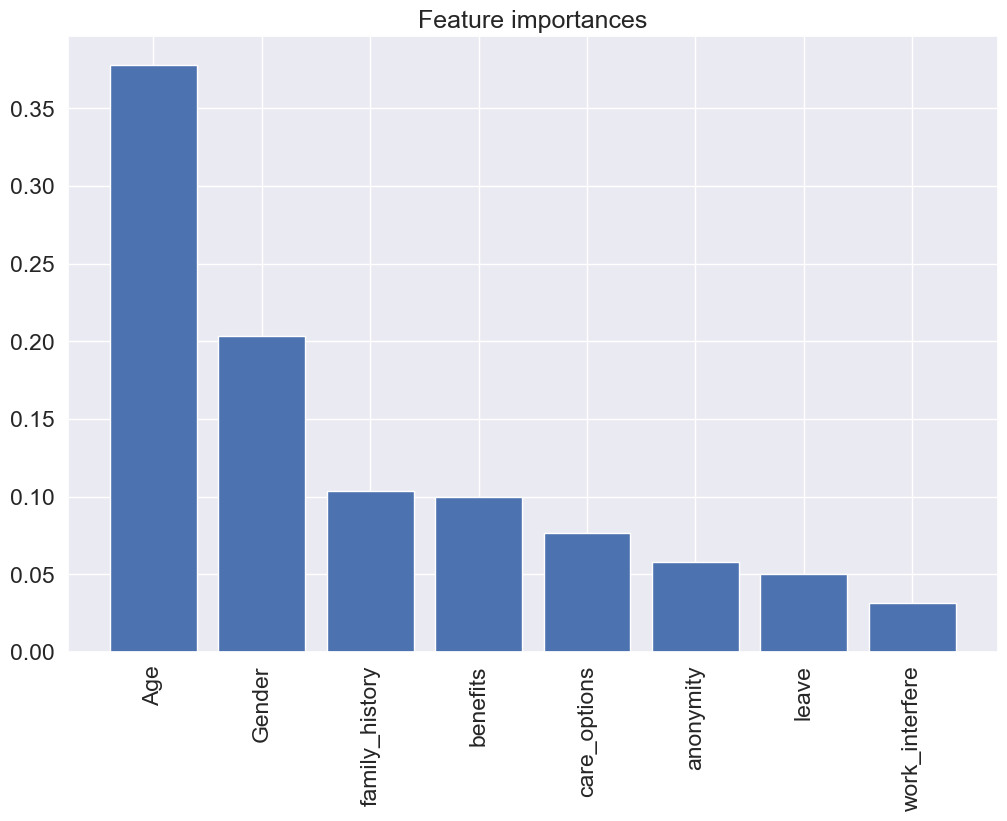

In [68]:
#checking most relevant features
feature_cols1 = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = data[feature_cols1]
y = data.treatment
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)
# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
#std = np.std([tree1.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols1[f])
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), labels, rotation='vertical')

The above features(age,gender,family history,benefits,care options,anonymity,leave,work interference) are the most important when it comes to creating a model.

The final conclusion based on the analysis done, is that factors such as age, gender and family history contribute to many people having menta health issues.

Most young people are at a high risk of mental illnesses.

More males suffer from mental health issues.

It is important for people to normalize talking about mental health issues and also get rid of the stigmatization around mental health.

In [71]:
# Scaling Age
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,10,0,0,1,2,1,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,16,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,20,0,0,0,3,1,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,20,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,20,0,0,0,1,0,1,1,2,...,0,1,1,1,2,2,2,0,0,2


In [72]:
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = data[feature_cols]
y = data.treatment

# spliting into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [73]:
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((378, 8), (378,))

Accuracy: 0.8148148148148148
Precision: 0.812807881773399
Recall: 0.8375634517766497
F1_Score: 0.825


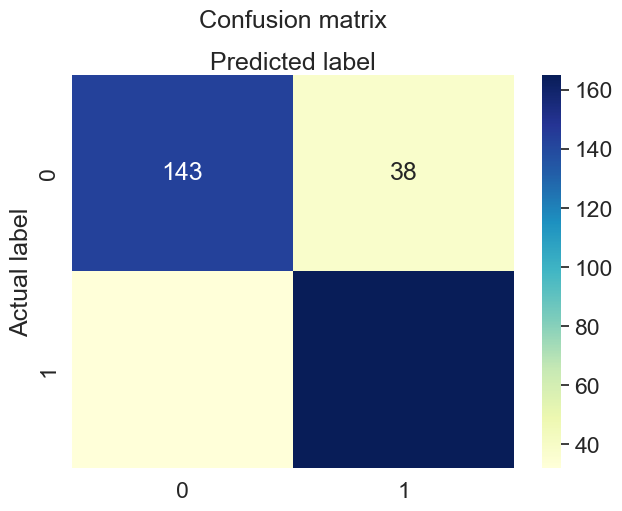

In [74]:
# logistic regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

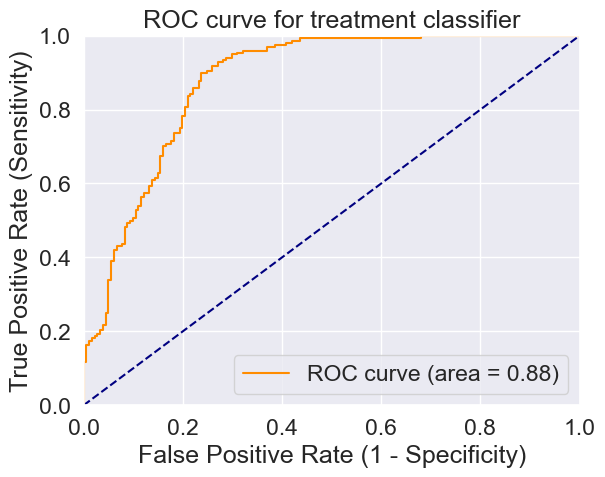

In [75]:
# ROC for logistic regression

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12         
plt.title('ROC curve for treatment classifier')        
plt.xlabel('False Positive Rate (1 - Specificity)')        
plt.ylabel('True Positive Rate (Sensitivity)')        
plt.legend(loc="lower right")        
plt.show()        
       

Accuracy: 0.7671957671957672
Precision: 0.7684729064039408
Recall: 0.7918781725888325
F1_Score: 0.7799999999999999


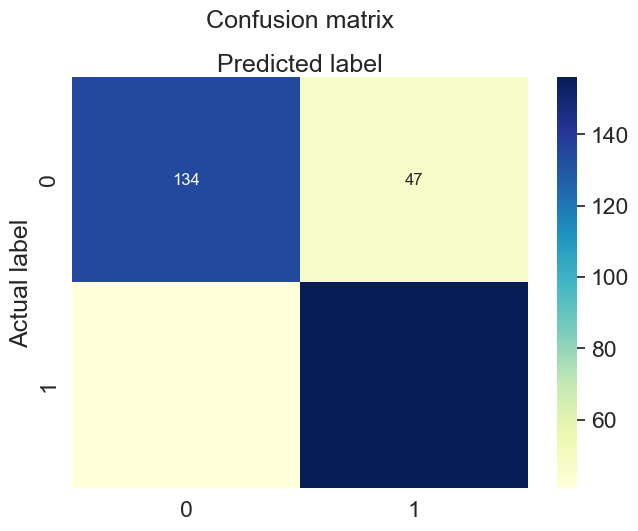

In [76]:
# KNeighour model
# instantiate the model (using the default parameters)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))


Accuracy: 0.7566137566137566
Precision: 0.7777777777777778
Recall: 0.7461928934010152
F1_Score: 0.7616580310880829


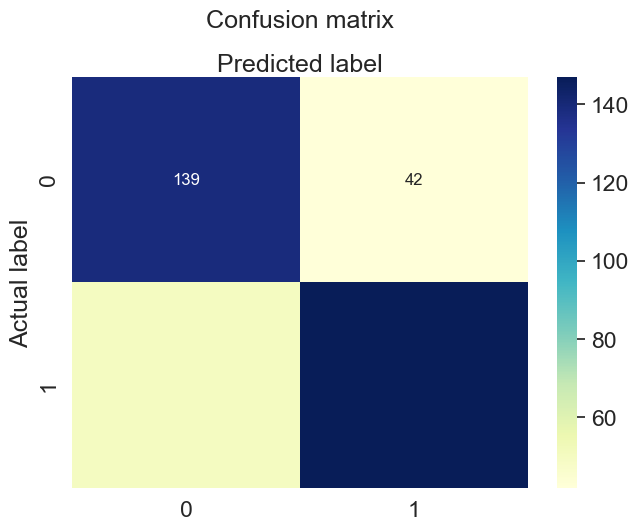

In [77]:
# Decision Tree Classifier

tree = DecisionTreeClassifier()

# fit the model with data
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7566137566137566
Precision: 0.7777777777777778
Recall: 0.7461928934010152
F1_Score: 0.7616580310880829


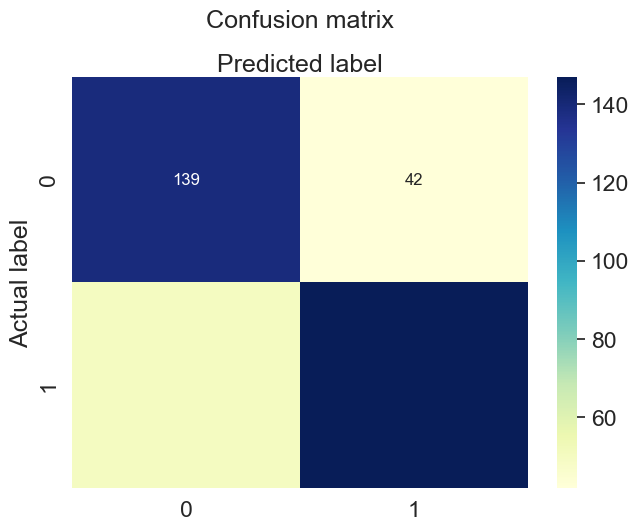

In [78]:
#Random Forest 

forest = RandomForestClassifier(n_estimators = 20)

# fit the model with data
forest.fit(X_train,y_train)
y_pred=tree.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8121693121693122
Precision: 0.8214285714285714
Recall: 0.817258883248731
F1_Score: 0.8193384223918574


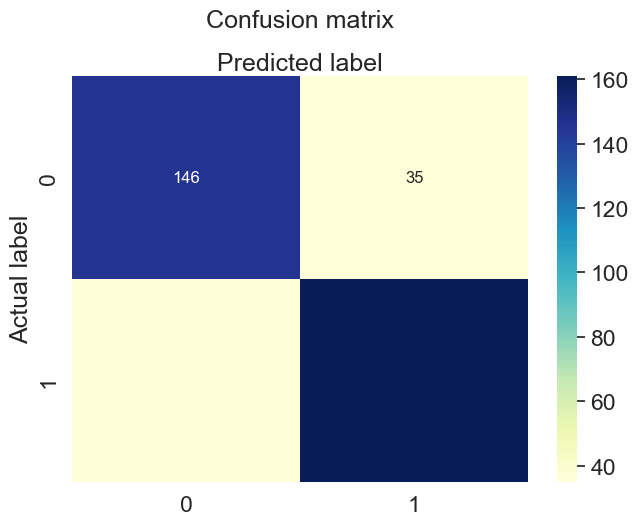

In [79]:
# Naive Bayes
gnb = GaussianNB()
# fit the model with data
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8121693121693122
Precision: 0.8028846153846154
Recall: 0.8477157360406091
F1_Score: 0.8246913580246914


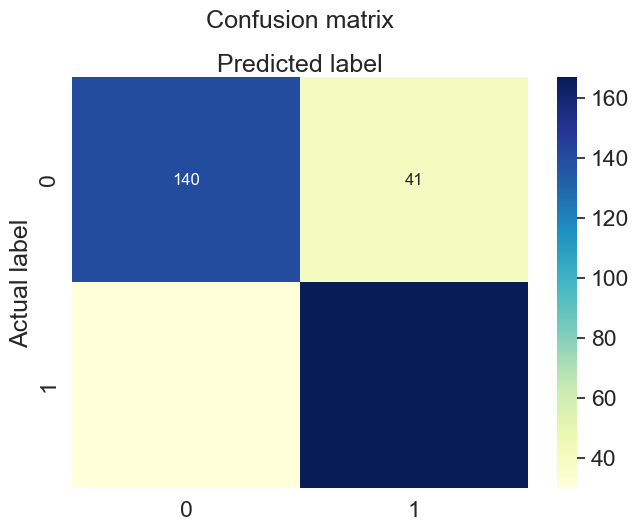

In [80]:
# Bagging classifier

bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    

# fit the model with data

bag.fit(X_train, y_train)
y_pred=bag.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.8333333333333334
Precision: 0.7887931034482759
Recall: 0.9289340101522843
F1_Score: 0.8531468531468531


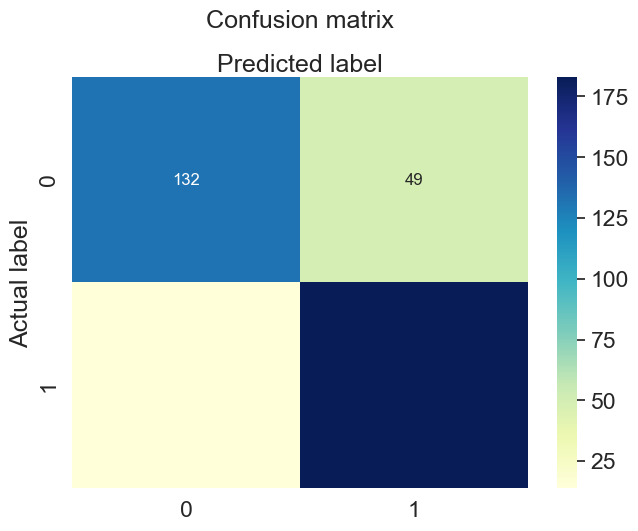

In [81]:
#Boosting with classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)

# fitting the model
boost.fit(X_train, y_train)
y_pred=boost.predict(X_test)

#confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1_Score:",metrics.f1_score(y_test, y_pred))

In [82]:
def tuningCV(knn):
    k_Range = list(Range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score1(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_Range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

In [83]:
#models
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators = 20)
gnb = GaussianNB()
bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)

#dt_reg = DecisionTreeRegressor(random_state = 0)
#bag_reg = BaggingRegressor(random_state = 0) 
#boost_reg = AdaBoostRegressor(random_state = 0)

models = {'LogisticRegression':logreg,'KNeighborsClassifier':knn,'DecisionTreeClassifier':tree,'RandomForestClassifier':forest, 'GaussianNB()':gnb, 'BaggingClassifier':bag, 
          'DecisionTreeClassifier': clf, 'AdaBoostClassifier':boost}

In [84]:
#training the model
def cross_valid(models, X, y, process = 'Training'):
    print(f'Process: {process}')
    for model_name, model in models.items():
        scores = cross_val_score(model, X, y, cv = 5)
        print(f'Model: {model_name}')
        print(f'Cross validation mean score: {round(np.mean(scores), 4)}')
        print(f'Cross validation deviation: {round(np.std(scores), 4)}')
        print('\n')

In [85]:
cross_valid(models, X_train, y_train, process = 'Training')

Process: Training
Model: LogisticRegression
Cross validation mean score: 0.8002
Cross validation deviation: 0.022


Model: KNeighborsClassifier
Cross validation mean score: 0.7797
Cross validation deviation: 0.0443


Model: DecisionTreeClassifier
Cross validation mean score: 0.8285
Cross validation deviation: 0.033


Model: RandomForestClassifier
Cross validation mean score: 0.7729
Cross validation deviation: 0.0334


Model: GaussianNB()
Cross validation mean score: 0.7979
Cross validation deviation: 0.0215


Model: BaggingClassifier
Cross validation mean score: 0.7514
Cross validation deviation: 0.0641


Model: AdaBoostClassifier
Cross validation mean score: 0.8081
Cross validation deviation: 0.0309




In [86]:
#testing the model
cross_valid(models, X_test, y_test, process = 'Testing')

Process: Testing
Model: LogisticRegression
Cross validation mean score: 0.8227
Cross validation deviation: 0.0288


Model: KNeighborsClassifier
Cross validation mean score: 0.7752
Cross validation deviation: 0.04


Model: DecisionTreeClassifier
Cross validation mean score: 0.836
Cross validation deviation: 0.0581


Model: RandomForestClassifier
Cross validation mean score: 0.8147
Cross validation deviation: 0.0457


Model: GaussianNB()
Cross validation mean score: 0.82
Cross validation deviation: 0.0453


Model: BaggingClassifier
Cross validation mean score: 0.8068
Cross validation deviation: 0.029


Model: AdaBoostClassifier
Cross validation mean score: 0.8148
Cross validation deviation: 0.0683




In [87]:
#fitting the model
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [88]:
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)
# Write predictions to csv file
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,133,0
1,286,1
2,675,0
3,156,1
4,653,0


In [89]:
# save the model 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import pickle 

forest = RandomForestClassifier(n_estimators = 20)

pickle.dump(forest, open('RandomForestClassifier', 'wb'))

# Conclusion

The age of employees is a major contributor to Mental Health Issues. 

Mental Health issues highest contribution factors are Age, Gender, Family History, Benefits, Treatment, Remote work and Self employed

Random Forest Classifier is the best model for prediction